# Plotting Unemployment Rates across U.S. by Months

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import geopandas as gpd
from scipy.stats import linregress

#Read Datasets
Asian_Data = pd.read_csv("Data/VD/Asian.csv")
White_data = pd.read_csv("Data/VD/White.csv")    
Hispanic_Data = pd.read_csv("Data/VD/Hispanic.csv")
African_American_Data = pd.read_csv("Data/VD/African American.csv")
 
#Rename Columns    
Asian_rename = Asian_Data.rename(columns = {'Value':'Asian'})
White_rename = White_data.rename(columns = {'Value':'White'})
Hispanic_rename = Hispanic_Data.rename(columns = {'Value':'Hispanic/Latino'})
African_American_rename = African_American_Data.rename(columns = {'Value':'African American/Black'})

#Remove unwanted columns
Asian_final = Asian_rename.drop(['Series ID','Year','Period'], axis=1)
White_final = White_rename.drop(['Series ID','Year','Period'], axis=1)
Hispanic_final = Hispanic_rename.drop(['Series ID','Year','Period'], axis=1)
African_American_final = African_American_rename.drop(['Series ID','Year','Period'], axis=1)

#Create single Dataframe
combined1_data = pd.merge(Asian_final, White_final, on = "Label", how = "left")
combined2_data = pd.merge(Hispanic_final, African_American_final, on = "Label", how = "left")
combined3_data = pd.merge(combined1_data, combined2_data, on = "Label", how = "left")
combined_data = combined3_data.rename(columns = {'Label':'Months'})
combined_data


,Months,Asian,White,Hispanic/Latino,African American/Black
0,2019 Jan,3.0,3.5,4.8,6.9
1,2019 Feb,3.1,3.2,4.3,7.0
2,2019 Mar,3.1,3.3,4.5,6.5
3,2019 Apr,2.3,3.2,4.1,6.6
4,2019 May,2.5,3.3,4.1,6.1
5,2019 Jun,2.2,3.3,4.3,6.0
6,2019 Jul,2.8,3.3,4.4,5.6
7,2019 Aug,2.8,3.4,4.2,5.2
8,2019 Sep,2.5,3.2,4.0,5.4
9,2019 Oct,2.9,3.3,4.2,5.6


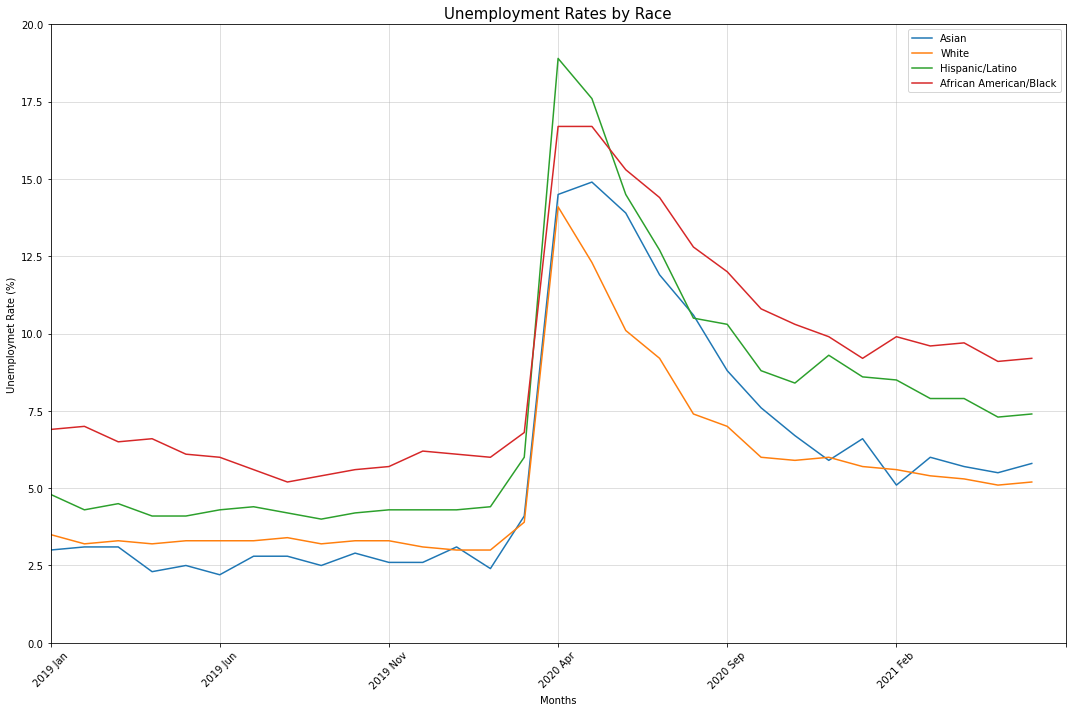

In [40]:
#Plot the chart for Unemployment Rates by Race

combined_data.plot("Months", ['Asian', 'White', 'Hispanic/Latino','African American/Black'], figsize =(15,10))
plt.xticks(rotation=45)
plt.xlim(0,30)
plt.ylim(0,20)
plt.title("Unemployment Rates by Race", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Unemploymet Rate (%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.tight_layout()
plt.savefig("Images/VD/Unemployment Rates by Race.png")
plt.show()

# Highest Unemployment Rate by Race

In [41]:
#Read data for statewise Unemployment rate during the year 2020

Demographics_by_State = pd.read_excel("Data/VD/State Unemployment by Demographics.xlsx")
Race_by_State = Demographics_by_State[["State","Population group","Unemployed Rate"]]


#Identify the state with highest unemploymnet rate for each Race

Race_List = ["Asian","White", "Black or African American","Hispanic or Latino ethnicity"]
White_by_State = Race_by_State.loc[Race_by_State["Population group"] == "White",:].max()
Asian_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Asian",:].max()
Latino_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:].max()
Black_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:].max()

Highest_Race = pd.DataFrame({
                                'Race-1': Asian_by_State,
                                'Race-2': White_by_State,
                                'Race-3': Latino_by_State,
                                'Race-4': Black_by_State

                            })
Highest_Race

,Race-1,Race-2,Race-3,Race-4
State,Washington,Wyoming,Wyoming,Wisconsin
Population group,Asian,White,Hispanic or Latino ethnicity,Black or African American
Unemployed Rate,16.9,11.8,15.3,19.1


In [42]:
Asian_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Asian",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Asian_Across_US = Asian_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Asians'})

White_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "White",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_White_Across_US = White_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Whites'})

Latino_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Latino_Across_US = Latino_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Hispanics'})

African_American_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_African_American_Across_US = African_American_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Black/African-Americans'})


race1_data = pd.merge(Rename_Asian_Across_US, Rename_White_Across_US, on = "State", how = "left")
race2_data = pd.merge(race1_data, Rename_Latino_Across_US, on = "State", how = "left")
races_merged = pd.merge(race2_data, Rename_African_American_Across_US, on = "State", how = "left")
arrange_race = races_merged.sort_values(by ="State", ascending = True)

arrange_race['Average Rate per State'] = arrange_race.mean(numeric_only=True, axis=1)
sort_race = arrange_race.sort_values(by ="Average Rate per State", ascending = False)
sort_race

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanics,Unemployed Rate in Black/African-Americans,Average Rate per State
0,Nevada,16.9,11.8,15.2,18.5,15.600000
1,Hawaii,12.1,11.8,12.6,13.9,12.600000
4,Pennsylvania,10.2,7.8,14.4,17.2,12.400000
2,New York,11.7,9.1,14.3,12.0,11.775000
21,Michigan,6.9,8.4,12.4,19.1,11.700000
8,Massachusetts,9.1,8.5,15.3,12.2,11.275000
11,Ohio,8.5,7.1,13.2,15.5,11.075000
6,California,9.6,9.9,11.7,12.2,10.850000
5,Rhode Island,9.9,8.6,15.2,9.4,10.775000
13,New Jersey,8.1,9.0,11.5,13.4,10.500000


In [43]:
#Fetch the information releavant to State of New Jersey alone

find_nj = arrange_race.loc[arrange_race["State"] == "New Jersey"]
find_nj

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanics,Unemployed Rate in Black/African-Americans,Average Rate per State
13,New Jersey,8.1,9.0,11.5,13.4,10.5


In [44]:
#Identify highest unnemployment rate for each race

Highest_rates = pd.DataFrame({
                                'Highest Rate in Asians':[sort_race['Unemployed Rate in Asians'].max()],
                                'Highest Rate in Whites':[sort_race['Unemployed Rate in Whites'].max()],
                                'Highest Rate in Hispanics':[sort_race['Unemployed Rate in Hispanics'].max()],
                                'Highest Rate in Blacks':[sort_race['Unemployed Rate in Black/African-Americans'].max()],
                                'Highest Avg. amongst States':[sort_race['Average Rate per State'].max()]

                            })
Highest_rates

,Highest Rate in Asians,Highest Rate in Whites,Highest Rate in Hispanics,Highest Rate in Blacks,Highest Avg. amongst States
0,16.9,11.8,15.3,19.1,15.6


# Trends among Asian Workers

Asian workers have seen uncharacteristically high unemployment rates throughout the pandemic, with their overall rate still just above 5% in June 2021. 


During 2020, Asian workers saw unemployment rates above 10% in 5 of the 30 states for which there was available unemployment data, with the highest rates in Nevada (16.9%), and Hawaii (12.1%). 

District of Columbia state saw the lowest Asian unemployment rate among the available states, at 4.0%.This rate was also below that of white workers in that state, whose unemployment rate was 4.1%. 

In the state of New jersey as well the rate for Asian population was lowest among other races at 8.1% well below average rate of the state (10.5%).

In [45]:
Asian_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Asian",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Asian_Across_US = Asian_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Asians'})
Rename_Asian_Across_US

,State,Unemployed Rate in Asians
Population group,,
Asian,Nevada,16.9
Asian,Hawaii,12.1
Asian,New York,11.7
Asian,Colorado,11.7
Asian,Pennsylvania,10.2
Asian,Rhode Island,9.9
Asian,California,9.6
Asian,Arizona,9.5
Asian,Massachusetts,9.1


In [69]:
Overall_rate_asian = Rename_Asian_Across_US['Unemployed Rate in Asians'].mean
Overall_rate_asian()

8.12

In [47]:
Rename_Asian_Across_US['State'].count()

30

# Trends among African-American Workers

African-American Workers workers have seen uncharacteristically high unemployment rates throughout the pandemic, with their overall rate still above 9% in June 2021. 


During 2020, black workers faced unemployment rates over 10% in 23 states out of 41 for which unemployment data for Black workers was available.

Unemployment rates were highest for Black workers in Michigan (19.1%), Nevada (18.5%) and Pennsylvania (17.2%).

Among states with available data, the unemployment rate for Black workers was lowest in Alaska, with a rate of 5.2%. 

In the state of New jersey Black workers were more likely to get unemployed compared to other races with highest unemployment ratio of 13.4% above the average rate of 10.5% in NJ state.


In [48]:
Black_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Black_Across_US = Black_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Black or African American'})
Rename_Black_Across_US

,State,Unemployed Rate in Black or African American
Population group,,
Black or African American,Michigan,19.1
Black or African American,Nevada,18.5
Black or African American,Pennsylvania,17.2
Black or African American,Wisconsin,16.2
Black or African American,New Mexico,15.8
Black or African American,Ohio,15.5
Black or African American,District of Columbia,14.7
Black or African American,Illinois,14.4
Black or African American,Hawaii,13.9


In [71]:
#States with Unemployment rate above 10.0%

Rename_Black_Across_US.loc[Rename_Black_Across_US["Unemployed Rate in Black or African American"] > 10.0,:]

,State,Unemployed Rate in Black or African American
Population group,,
Black or African American,Michigan,19.1
Black or African American,Nevada,18.5
Black or African American,Pennsylvania,17.2
Black or African American,Wisconsin,16.2
Black or African American,New Mexico,15.8
Black or African American,Ohio,15.5
Black or African American,District of Columbia,14.7
Black or African American,Illinois,14.4
Black or African American,Hawaii,13.9


In [50]:
(Rename_Black_Across_US.loc[Rename_Black_Across_US["Unemployed Rate in Black or African American"] > 10.0,:]).count()

State                                           23
Unemployed Rate in Black or African American    23
dtype: int64

In [51]:
Overall_rate_black = Rename_Black_Across_US['Unemployed Rate in Black or African American'].mean
Overall_rate_black()

11.209756097560977

In [52]:
Rename_Black_Across_US['State'].count()

41

# Connsistent Gap in Unemployment between Black and White Population

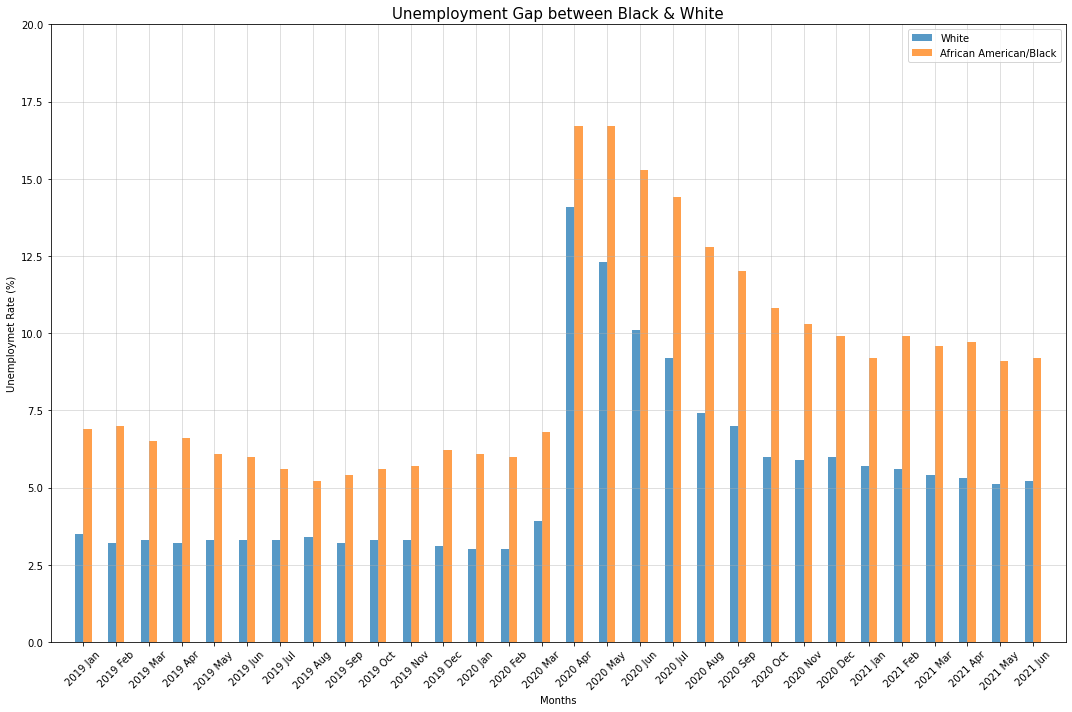

In [74]:
#Prepare the frame
combined_data['Black-White Gap'] = combined_data['African American/Black'].subtract(combined_data['White'],fill_value=None)
Black_white_gap = combined_data[["Months", "White", "African American/Black", "Black-White Gap"]]
bw_gap_mean = round(combined_data['Black-White Gap'].mean())

#Plot the chart showing Connsistent Gap in Unemployment Rate with an avergae of 4.0%

Black_white_gap.plot("Months", [ 'White','African American/Black'], kind='bar',figsize =(15,10), alpha = 0.75)
plt.xticks(rotation=45)
plt.xlim(-1,30)
plt.ylim(0,20)
plt.title("Unemployment Gap between Black & White", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Unemploymet Rate (%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.tight_layout()
plt.savefig("Images/VD/Black vs White Divide.png")
plt.show()

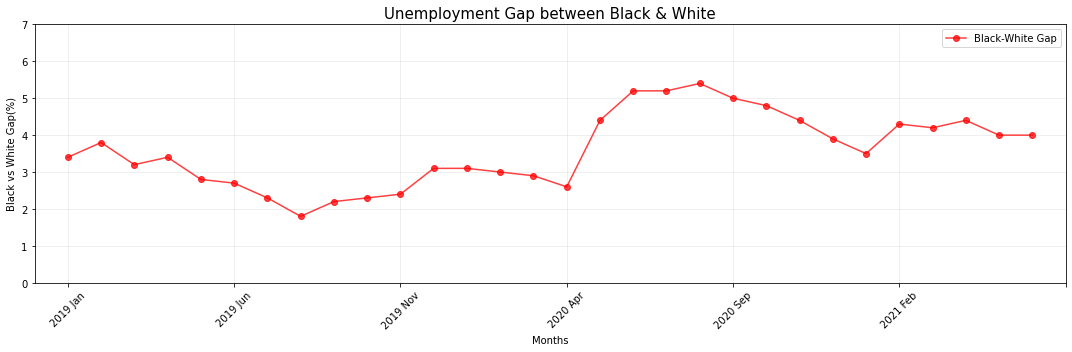

In [75]:
#Progression of Unemployment Gap between Black & White between 2019-2021

Black_white_gap.plot("Months", "Black-White Gap",figsize =(15,5), alpha = 0.75, marker ='o', color='red')
plt.xticks(rotation=45)
plt.xlim(-1,30)
plt.ylim(0,7)
plt.title("Unemployment Gap between Black & White", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Black vs White Gap(%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.25) 
plt.tight_layout()
plt.savefig("Images/VD/Black vs White Gap.png")
plt.show()

The r-squared is: 0.937642750764527
slope: 1.177193, intercept: 2.647332


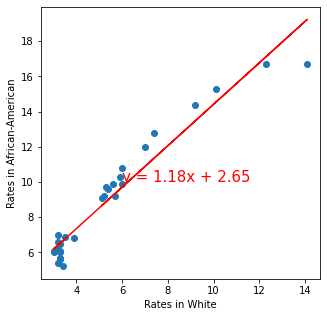

In [93]:
# Add the linear regression equation and line to plot
fig = plt.figure(figsize=(5,5))
x_values = Black_white_gap['White']
y_values = Black_white_gap['African American/Black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rates in White')
plt.ylabel('Rates in African-American')
print(f"The r-squared is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.savefig("Images/VD/linear Regression between Black & White.png")
plt.show()

The correlation between black and white population is 0.97


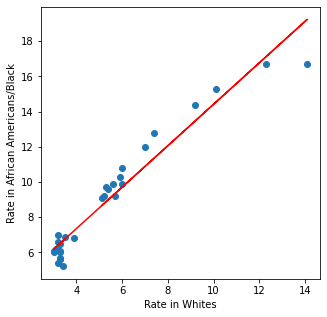

In [91]:
fig = plt.figure(figsize=(5,5))

x_axis = combined_data['White']
y_axis = combined_data ['African American/Black']


correlation = round(st.pearsonr(x_axis, y_axis)[0],2)

print(f"The correlation between black and white population is {correlation}")

reg = st.linregress(x_axis ,y_axis)
y_values = x_axis * reg[0]+ reg[1]

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y_values,color="red")


plt.xlabel('Rate in Whites')
plt.ylabel('Rate in African Americans/Black')
plt.savefig("Images/VD/Correlation between Black & White.png")
plt.show()



# Trends among white workers


In June 2021, the white unemployment rate was 5.2%, still up 1.3% points relative to what we now recognize was the peak (3.9%) of the previous economic recovery in March 2020. 

During the pandemic of 2020, average white unemployment rate was at 6.6% with only 2 states being above 10% unemployment rate that is Hawaii and Nevada.

Hawaii facing the highest rates, at 11.8%, likely due to the significant blow the pandemic dealt to the tourism and hospitality industries. 

The remaining one state where unemployment remained same as Hawaii was Nevada with 11.8%.


In [61]:
White_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "White",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_White_Across_US = White_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in White'})
Rename_White_Across_US

,State,Unemployed Rate in White
Population group,,
White,Hawaii,11.8
White,Nevada,11.8
White,California,9.9
White,New York,9.1
White,New Jersey,9.0
White,Rhode Island,8.6
White,Illinois,8.5
White,Massachusetts,8.5
White,Michigan,8.4


In [62]:
Overall_rate_white = Rename_White_Across_US['Unemployed Rate in White'].mean
Overall_rate_white()

6.603921568627449

In [63]:
Rename_White_Across_US['State'].count()

51

In [76]:
#States with Unemployment rate above 10.0%
Rename_White_Across_US.loc[Rename_White_Across_US['Unemployed Rate in White'] > 10.0,:]

,State,Unemployed Rate in White
Population group,,
White,Hawaii,11.8
White,Nevada,11.8


# Trends among Hispanic workers

The overall unemployment rate for Hispanic workers was the highest (18.9%) amongst the other races during the pandemic of 2020. Yet it fell below that of Black workers’ to 7.4% in June 2021, still 3.1 percentage points above the pre-pandemic economic peak.

Hispanic workers faced unemployment greater than 10% in eight out of the 15 states with available data.

Hispanic workers in Massachusetts faced the highest unemployment rate of all groups measured, at 15.3%, followed relatively closely behind by Hispanic workers in Rhode Island who faced a 15.2% unemployment rate, and Hispanic Nevadans at 15.2%.  Hispanics in NJ also reported above 10% unemployment rate at 11.5%.


Hispanic workers in Kentucky saw the lowest unemployment rates in our data at 4.7%, followed by Hispanic Arkansas at 4.8%.

In [65]:
Latino_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Latino_Across_US = Latino_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Hispanics'})
Rename_Latino_Across_US

,State,Unemployed Rate in Hispanics
Population group,,
Hispanic or Latino ethnicity,Massachusetts,15.3
Hispanic or Latino ethnicity,Rhode Island,15.2
Hispanic or Latino ethnicity,Nevada,15.2
Hispanic or Latino ethnicity,New Hampshire,15.0
Hispanic or Latino ethnicity,Pennsylvania,14.4
Hispanic or Latino ethnicity,New York,14.3
Hispanic or Latino ethnicity,Ohio,13.2
Hispanic or Latino ethnicity,Hawaii,12.6
Hispanic or Latino ethnicity,Michigan,12.4


In [66]:
Overall_rate_Latino = Rename_Latino_Across_US['Unemployed Rate in Hispanics'].mean
Overall_rate_Latino()

9.58695652173913

In [67]:
Rename_Latino_Across_US['State'].count()

46

In [78]:
#States with Unemployment rate above 10.0%
Rename_Latino_Across_US.loc[Rename_Latino_Across_US['Unemployed Rate in Hispanics'] > 10.0,:]

,State,Unemployed Rate in Hispanics
Population group,,
Hispanic or Latino ethnicity,Massachusetts,15.3
Hispanic or Latino ethnicity,Rhode Island,15.2
Hispanic or Latino ethnicity,Nevada,15.2
Hispanic or Latino ethnicity,New Hampshire,15.0
Hispanic or Latino ethnicity,Pennsylvania,14.4
Hispanic or Latino ethnicity,New York,14.3
Hispanic or Latino ethnicity,Ohio,13.2
Hispanic or Latino ethnicity,Hawaii,12.6
Hispanic or Latino ethnicity,Michigan,12.4


# Widening Gap in Unemployment between Hispanic and White Workers

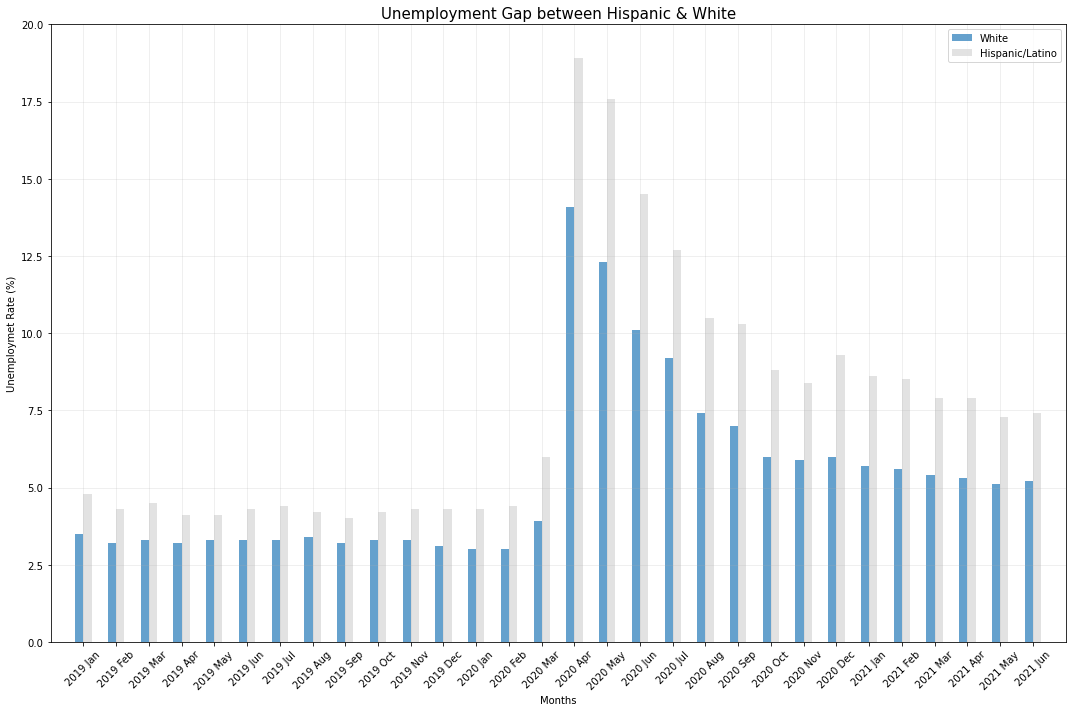

In [83]:
#Prepare the frame
combined_data['Hispanic-White Gap'] = combined_data['Hispanic/Latino'].subtract(combined_data['White'],fill_value=None)
Hispanic_white_gap = combined_data[["Months", "White", "Hispanic/Latino", "Hispanic-White Gap"]]
hw_gap_mean = round(combined_data['Hispanic-White Gap'].mean())

#Plot the chart showing Connsistent Gap in Unemployment Rate with an avergae of 2.0%

Hispanic_white_gap.plot("Months", [ 'White','Hispanic/Latino'], kind='bar',figsize =(15,10), alpha = 0.75, colormap = 'tab20c')
plt.xticks(rotation=45)
plt.xlim(-1,30)
plt.ylim(0,20)
plt.title("Unemployment Gap between Hispanic & White", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Unemploymet Rate (%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.25) 
plt.tight_layout()
plt.savefig("Images/VD/Hispanic vs White Divide.png")
plt.show()

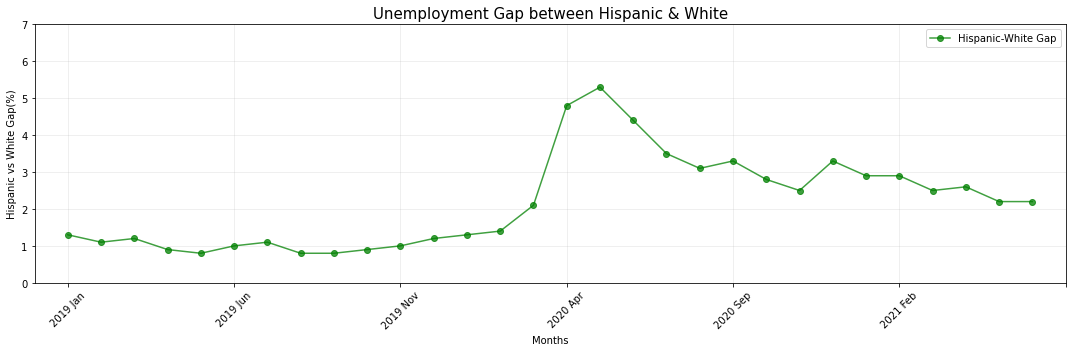

In [87]:
#Progression of Unemployment Gap between Hispanic & White between 2019-2021

Hispanic_white_gap.plot("Months", "Hispanic-White Gap",figsize =(15,5), alpha = 0.75, marker ='o', color='green')
plt.xticks(rotation=45)
plt.xlim(-1,30)
plt.ylim(0,7)
plt.title("Unemployment Gap between Hispanic & White", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Hispanic vs White Gap(%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.25) 
plt.tight_layout()
plt.savefig("Images/VD/Hispanic vs White Gap.png")
plt.show()

The r-squared is: 0.9893424431504253
slope: 1.420209, intercept: -0.062176


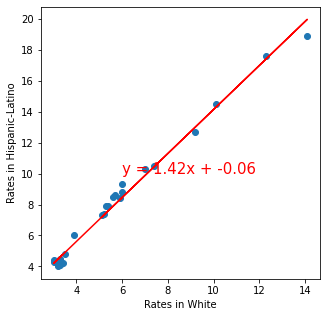

In [90]:
# Add the linear regression equation and line to plot
fig = plt.figure(figsize=(5,5))
x_values = Hispanic_white_gap['White']
y_values = Hispanic_white_gap['Hispanic/Latino']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rates in White')
plt.ylabel('Rates in Hispanic-Latino')
print(f"The r-squared is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.savefig("Images/VD/linear Regression between Hispanic & White.png")
plt.show()

# Unemployment Rate in June'21 using Choropleth Map

In [101]:
#Prepare the frame-1 with latest Unemployment Date from Jue 2021

US_state_df = pd.read_excel("Data/VD/June21.xlsx")
US_state_df.sort_values(by ="States", ascending = True)

#Import shape file for the map of US with Alaskan annd Hawaiian states
#Make sure to install geopandas library
fp ="Data/VD/USA_adm1.shx"

#Convert the shape file into frame-2
map_df = gpd.read_file(fp) 


#Combine frmae-1 &2
merged = map_df.join(US_state_df)
merged = merged.dropna()
merged = merged[['States', 'geometry', 'Unemployment Rate in June 2021', 'Rank']]

Rates = 'Unemployment Rate in June 2021'
vmin = 0
vmax = max(Rates)

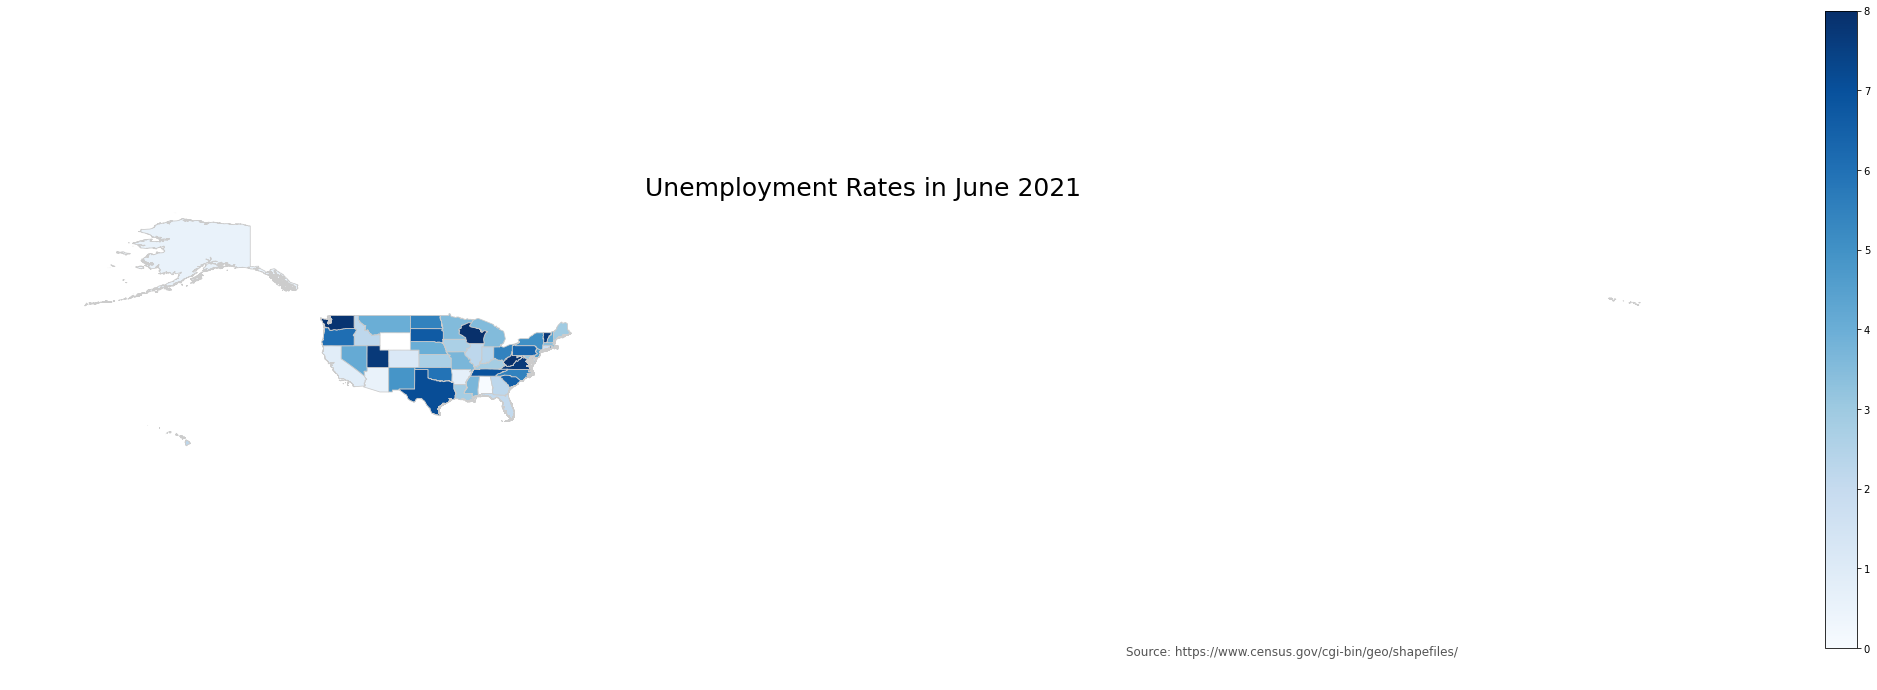

In [102]:
# set the value column that will be visualised
variable = 'Unemployment Rate in June 2021'

# set the range for the choropleth values
vmin, vmax = 0, 8

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Unemployment Rates in June 2021', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: https://www.census.gov/cgi-bin/geo/shapefiles/ ', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(500, 500))

plt.tight_layout()
plt.savefig("Images/VD/June'21 Choropleth.png")